# Strava Exercise Data Analysis

---

### Table of Contents
1. [Introduction](#introduction-section)
    - [Adherence to Rule et al.'s Ten Rules for Computational Analyses](#rules-section)
2. [Data Collection and Cleaning](#data-collection-and-cleaning-section)
3. [Grouped Observations](#grouped-observations-section)
4. [Metric Descriptions and Visualizations by Time of Day (August Only)](#metric-descriptions-section)
   - [Air Power](#air-power-section)
   - [Form Power](#form-power-section)
   - [Power](#power-section)
   - [Cadence](#cadence-section)
   - [Ground Time](#ground-time-section)
   - [Leg Spring Stiffness](#leg-spring-stiffness-section)
   - [Vertical Oscillation](#vertical-oscillation-section)
5. [Observations on Heart Rate and Distance](#observations-on-heart-rate-and-distance-section)
   - [Heart Rate Observations](#heart-rate-section)
   - [Distance Observations](#distance-section)
6. [Summary and Key Insights](#summary-and-key-insights-section)

<a id="introduction-section"></a>
# Introduction
The purpose of this analysis is to explore exercise data collected by Professor Chris Brooks in the summer of 2019. By analyzing data on various metrics (e.g., power, cadence, heart rate) based on the time of day and month, we aim to identify trends and patterns. Key rules from Rule et al.'s guidelines are used to enhance clarity and visual storytelling.

<a id="rules-section"></a>
# Adherence to Rule et al.'s Ten Rules for Computational Analyses

This notebook follows several principles outlined in Rule et al.'s "Ten Rules for Computational Analyses" to enhance the clarity, effectiveness, and professionalism of the data analysis and visualizations presented. Below is an explanation of how each selected rule was implemented in the notebook:

### Rule 1: Know Your Audience
**Evidence:** Given that this analysis was created for Professor Chris Brooks, who is familiar with exercise data, the visualizations and explanations are tailored to a technically informed audience. The metrics were selected and described with detailed physiological insights relevant to running performance, focusing on advanced analysis techniques such as Gaussian Mixture Models and KDE plots to showcase specific trends in the dataset.

### Rule 5: Do Not Trust the Defaults
**Evidence:** Each plot was carefully customized beyond default settings in the visualization library (Matplotlib and Seaborn) to improve clarity and readability. For example, specific color palettes, axis labels, and titles were chosen to highlight key observations while ensuring consistency across visualizations. For box and violin plots, custom outlier removal was implemented to offer a clearer view of data trends without default outlier representation.

### Rule 6: Use Color Effectively
**Evidence:** Distinct color schemes were chosen to differentiate between time-of-day categories, enhancing interpretability. Sequential and diverging color palettes were applied appropriately in KDE plots and histograms to visually separate density estimates by categories like `time_of_day` and `month_name`, providing clear, intuitive insights for each time period.

### Rule 9: Message Trumps Beauty
**Evidence:** While the notebook includes aesthetically appealing visuals, the primary focus remains on clarity and accurate representation of data. For example, each plot’s layout, colors, and labels were adjusted to ensure that the core message of each metric's behavior by time of day and month is conveyed without distraction. The Gaussian Mixture Model plot for heart rate, in particular, was designed to clearly communicate the bimodal distribution observed during the afternoon.

<a id="data-collection-and-cleaning-section"></a>
## Data Collection and Cleaning

In [1]:
import warnings
warnings.filterwarnings('ignore')


# Load data and create new columns
import os
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture

df = pd.read_csv("data/strava/strava.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['month_name'] = df['timestamp'].dt.strftime('%B')
df['time_of_day'] = pd.cut(df['timestamp'].dt.hour, bins=[0, 6, 12, 18, 24], labels=["Night", "Morning", "Afternoon", "Evening"], right=False)

# Drop unnecessary columns
columns_to_drop = ['cadence', 'datafile', 'altitude', 'enhanced_altitude', 'enhanced_speed', 'fractional_cadence', 'position_lat', 'position_long', 'speed', 'unknown_87', 'unknown_88', 'unknown_90']
df = df.drop(columns=columns_to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40649 entries, 0 to 40648
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Air Power             17842 non-null  float64       
 1   Cadence               17847 non-null  float64       
 2   Form Power            17842 non-null  float64       
 3   Ground Time           17847 non-null  float64       
 4   Leg Spring Stiffness  17842 non-null  float64       
 5   Power                 17847 non-null  float64       
 6   Vertical Oscillation  17847 non-null  float64       
 7   distance              40649 non-null  float64       
 8   heart_rate            38355 non-null  float64       
 9   timestamp             40649 non-null  datetime64[ns]
 10  month_name            40649 non-null  object        
 11  time_of_day           40649 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(9), object(1)
memory usage: 3.5

<a id="grouped-observations-section"></a>
## Grouped Observations

Using `grouped_data = df.groupby(['month_name', 'time_of_day']).count()`, we observed that:

- **August** data includes all metrics, while only **cadence** and **heart rate** data are nearly consistent across all times and months.

In [2]:
grouped_data = df.groupby(['month_name', 'time_of_day']).count()
grouped_data

Air Power  Cadence  Form Power  Ground Time  \
month_name time_of_day                                                
August     Night             6602     6602        6602         6602   
           Morning            557      562         557          562   
           Afternoon         1265     1265        1265         1265   
           Evening           9418     9418        9418         9418   
July       Night                0        0           0            0   
           Morning              0        0           0            0   
           Afternoon            0        0           0            0   
           Evening              0        0           0            0   
October    Night                0        0           0            0   
           Morning              0        0           0            0   
           Afternoon            0        0           0            0   
           Evening              0        0           0            0   
September  Night                0        0           0            0   
           Morning              0        0           0            0   
           Afternoon            0        0           0            0   
           Evening              0        0           0            0   

                        Leg Spring Stiffness  Power  Vertical Oscillation  \
month_name time_of_day                                                      
August     Night                        6602   6602                  6602   
           Morning                       557    562                   562   
           Afternoon                    1265   1265                  1265   
           Evening                      9418   9418                  9418   
July       Night                           0      0                     0   
           Morning                         0      0                     0   
           Afternoon                       0      0                     0   
           Evening                         0      0                     0   
October    Night                           0      0                     0   
           Morning                         0      0                     0   
           Afternoon                       0      0                     0   
           Evening                         0      0                     0   
September  Night                           0      0                     0   
           Morning                         0      0                     0   
           Afternoon                       0      0                     0   
           Evening                         0      0                     0   

                        distance  heart_rate  timestamp  
month_name time_of_day                                   
August     Night            7407        7407       7407  
           Morning           562         562        562  
           Afternoon        1265        1265       1265  
           Evening         12851       12851      12851  
July       Night            1087        1087       1087  
           Morning           161         161        161  
           Afternoon        1784        1784       1784  
           Evening          7662        7662       7662  
October    Night               0           0          0  
           Morning             0           0          0  
           Afternoon           0           0          0  
           Evening          1305        1305       1305  
September  Night             501         501        501  
           Morning             0           0          0  
           Afternoon           0           0          0  
           Evening          6064        3770       6064

<a id="metric-descriptions-section"></a>
## Metric Descriptions and Visualizations by Time of Day (August Only)

This section provides descriptions for each metric and includes visualizations specific to **August** data by time of day. The following steps were taken to prepare the data for each visualization:

1. **Filtering Data for August**: To focus specifically on the metrics with complete entries in August, a new DataFrame containing only the August data was created. This allowed for consistent visualizations across all metrics with data available only for this month.

2. **Ordering `time_of_day`**: To ensure a logical progression in the visualizations, the `time_of_day` column was ordered categorically from "Morning" to "Afternoon," "Evening," and "Night." This helps maintain consistency across visualizations and enables clearer interpretation of trends throughout the day.

3. **Outlier Removal**: An outlier removal function was applied to each metric to improve the clarity and accuracy of the plots. This function uses the **Interquartile Range (IQR) method** to identify and remove outliers. Specifically, data points below the first quartile or above the third quartile by 1.5 times the IQR are considered outliers and removed. This ensures that the visualizations better represent the central trends in the data without distortion from extreme values.

In [3]:
# Step 1: Filter data for August
august_data = df[df['month_name'] == 'August']

# Step 2: Order `time_of_day` column
time_of_day_order = ["Morning", "Afternoon", "Evening", "Night"]
august_data['time_of_day'] = pd.Categorical(august_data['time_of_day'], categories=time_of_day_order, ordered=True)

# Step 3: Outlier removal function using IQR
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    return data[(data[column] >= Q1 - 1.5 * IQR) & (data[column] <= Q3 + 1.5 * IQR)]

Below are descriptions for each metric, followed by visualizations that explore their distributions by time of day.

---
### Metrics Overview

<a id="air-power-section"></a>
#### Air Power
**Description:** Air Power measures the power required to overcome air resistance. This metric accounts for various environmental and individual factors, such as wind conditions, humidity, temperature, air density, and body morphology. The new Stryd device calculates this in real-time, offering insights into how external factors impact running performance.

*Visualization:* Box plot of Air Power by time of day

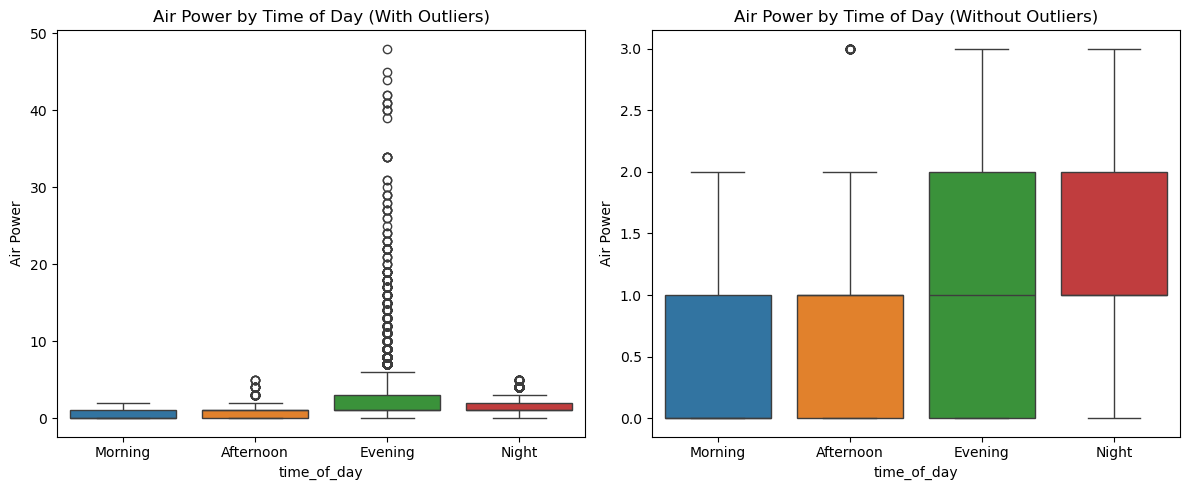

In [4]:
# Define the directory for saving plots
#save_dir = "plots"
#os.makedirs(save_dir, exist_ok=True)

# Visualization for Air Power with and without outliers
plt.figure(figsize=(12, 5))

# With Outliers
plt.subplot(1, 2, 1)
sns.boxplot(data=august_data, x="time_of_day", y="Air Power", hue='time_of_day')
plt.title("Air Power by Time of Day (With Outliers)")

# Without Outliers
filtered_data = remove_outliers(august_data, "Air Power")
plt.subplot(1, 2, 2)
sns.boxplot(data=filtered_data, x="time_of_day", y="Air Power", hue='time_of_day')
plt.title("Air Power by Time of Day (Without Outliers)")

# Save the combined plot
plt.tight_layout()
#plt.savefig(os.path.join(save_dir, "air_power_with_and_without_outliers.png"))

plt.show()

**Observation:**
Air Power remains relatively stable across the day but increases noticeably at night. This might reflect changing environmental conditions, such as wind resistance during night runs, or increased intensity that could involve more outdoor sessions with airflow.
---

<a id="form-power-section"></a>
### Form Power
**Description:** Form Power represents a component of running power that is directly related to vertical oscillation and cadence. It is weight-dependent and generally correlates with the metabolic cost of running at a given pace. Lowering Form Power can indicate increased efficiency by reducing metabolic power and rate of perceived exertion (RPE).

*Visualization:* Box plot of Form Power by time of day

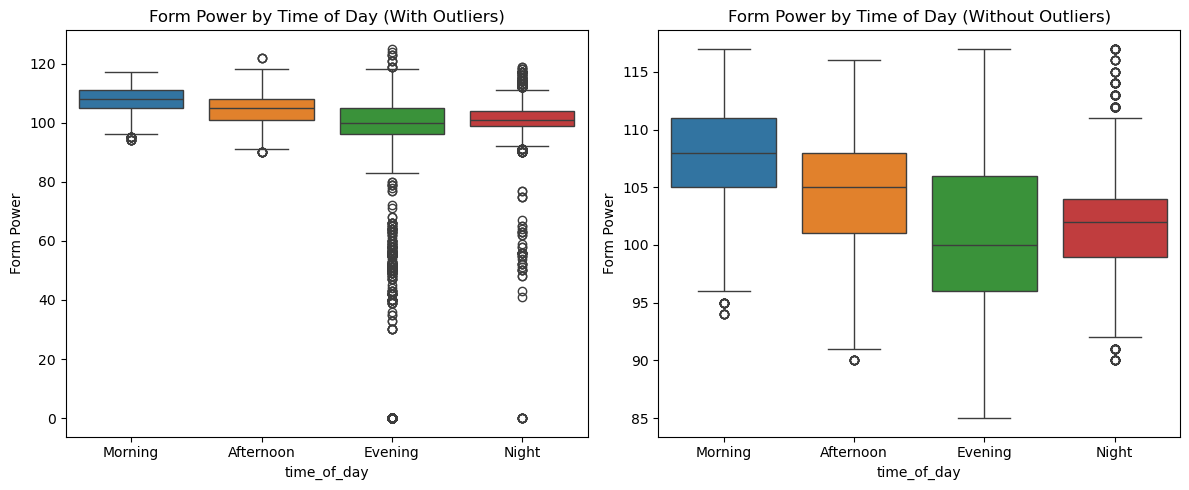

In [5]:
# Visualization for Form Power with and without outliers
plt.figure(figsize=(12, 5))

# With Outliers
plt.subplot(1, 2, 1)
sns.boxplot(data=august_data, x="time_of_day", y="Form Power", hue='time_of_day')
plt.title("Form Power by Time of Day (With Outliers)")

# Without Outliers
filtered_data = remove_outliers(august_data, "Form Power")
plt.subplot(1, 2, 2)
sns.boxplot(data=filtered_data, x="time_of_day", y="Form Power", hue='time_of_day')
plt.title("Form Power by Time of Day (Without Outliers)")

# Adjust layout
plt.tight_layout()

# Save the figure with a descriptive filename
#plt.savefig(os.path.join(save_dir, "form_power_with_and_without_outliers.png"))

plt.show()

**Observation:**
Form Power decreases from morning to evening but exhibits a slight increase at night. This could suggest that evening sessions involve a reduction in vertical oscillation or a shift in running mechanics, with a slight form adjustment seen at night.
---

<a id="power-section"></a>
#### Power
**Description:** Running Power, calculated based on three-dimensional foot movement, accelerations, and impacts, is a core metric. This metric quantifies the energy expenditure required for each step, providing an objective way to track running performance and effort level.

*Visualization:* Box plot of Power by time of day

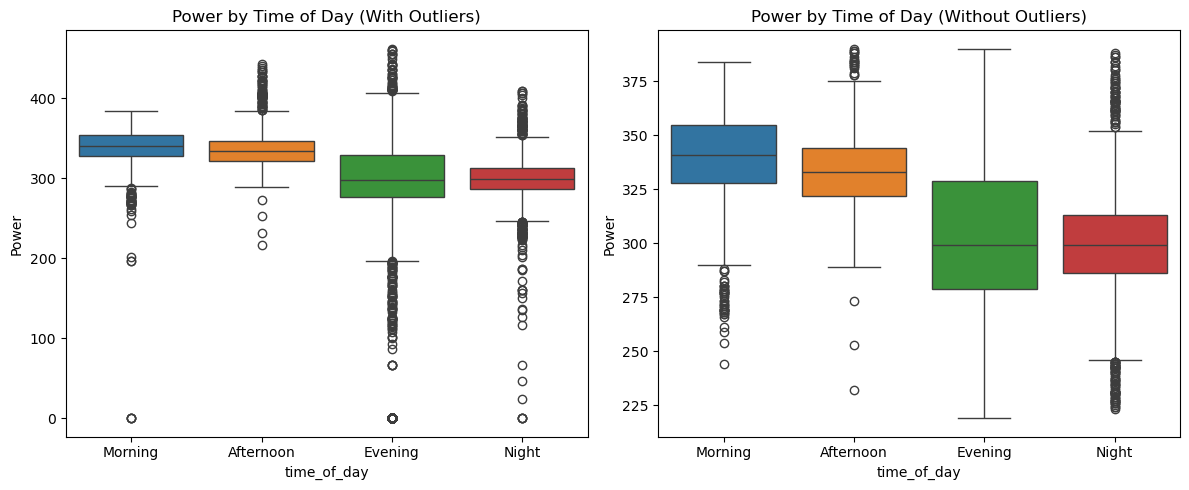

In [6]:
# Visualization for Power with and without outliers
plt.figure(figsize=(12, 5))

# With Outliers
plt.subplot(1, 2, 1)
sns.boxplot(data=august_data, x="time_of_day", y="Power", hue='time_of_day')
plt.title("Power by Time of Day (With Outliers)")

# Without Outliers
filtered_data = remove_outliers(august_data, "Power")
plt.subplot(1, 2, 2)
sns.boxplot(data=filtered_data, x="time_of_day", y="Power", hue='time_of_day')
plt.title("Power by Time of Day (Without Outliers)")

# Adjust layout
plt.tight_layout()

# Save the figure with descriptive filename
#plt.savefig(os.path.join(save_dir, "power_with_and_without_outliers.png"))

plt.show()

**Observation:**
Power tends to decrease as the day progresses. Morning and afternoon sessions show higher power outputs, likely indicative of more intensive activities, while evening and night sessions might be lighter or more endurance-focused.
---

<a id="cadence-section"></a>
### Cadence
**Description:** Cadence measures the number of steps taken per minute (SPM). It is an indicator of running rhythm and can be affected by fatigue, which may lead to lower cadence over time. Cadence varies by individual due to physical characteristics and running form.

*Visualization:* Violin plot of Cadence by time of day

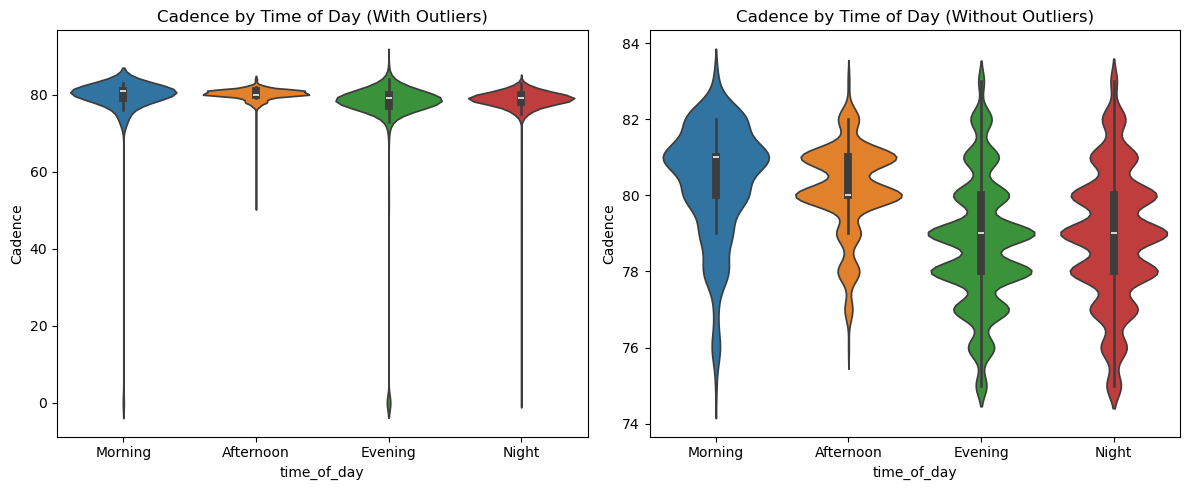

In [7]:
# Visualization for Cadence with and without outliers
plt.figure(figsize=(12, 5))

# With Outliers
plt.subplot(1, 2, 1)
sns.violinplot(data=august_data, x="time_of_day", y="Cadence", hue='time_of_day')
plt.title("Cadence by Time of Day (With Outliers)")

# Without Outliers
filtered_data = remove_outliers(august_data, "Cadence")
plt.subplot(1, 2, 2)
sns.violinplot(data=filtered_data, x="time_of_day", y="Cadence", hue='time_of_day')
plt.title("Cadence by Time of Day (Without Outliers)")

# Adjust layout
plt.tight_layout()

# Save the figure with descriptive filename
#plt.savefig(os.path.join(save_dir, "cadence_with_and_without_outliers.png"))

plt.show()

**Observation:**
Cadence is relatively stable across all times, though there’s a broader range in the afternoon. This variation may reflect different running speeds, with some participants possibly engaging in interval training.
---

<a id="ground-time-section"></a>
### Ground Contact Time
**Description:** Ground Contact Time (GCT) is the time, measured in milliseconds, that a runner’s foot is in contact with the ground per stride. GCT inversely correlates with metabolic power; lower GCT typically indicates higher metabolic power. Factors such as shoe type, fatigue, and pace can affect this metric.

*Visualization:* Violin plot of Ground Contact Time by time of day

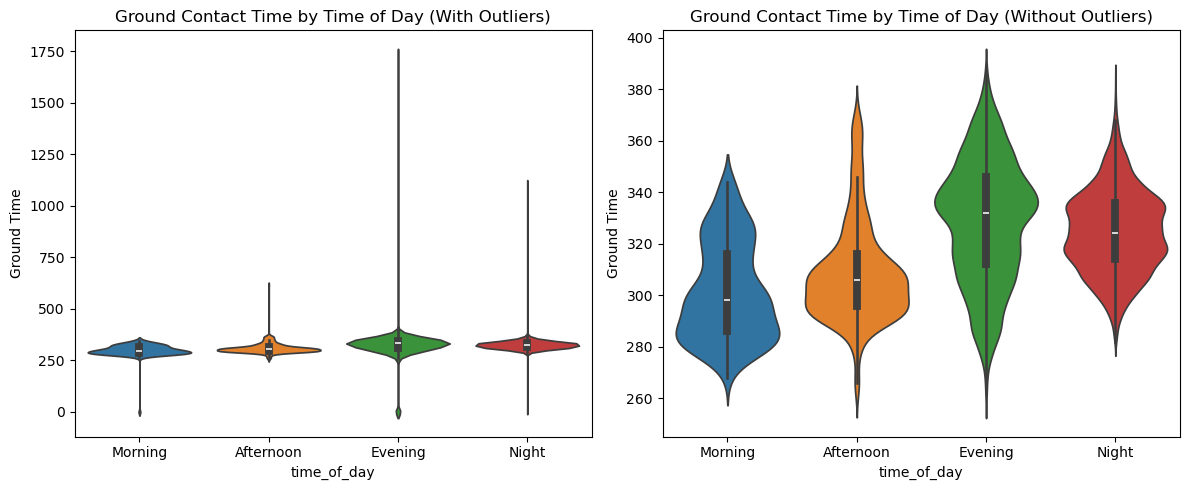

In [8]:
# Visualization for Ground Contact Time with and without outliers
plt.figure(figsize=(12, 5))

# With Outliers
plt.subplot(1, 2, 1)
sns.violinplot(data=august_data, x="time_of_day", y="Ground Time", hue='time_of_day')
plt.title("Ground Contact Time by Time of Day (With Outliers)")

# Without Outliers
filtered_data = remove_outliers(august_data, "Ground Time")
plt.subplot(1, 2, 2)
sns.violinplot(data=filtered_data, x="time_of_day", y="Ground Time", hue='time_of_day')
plt.title("Ground Contact Time by Time of Day (Without Outliers)")

# Adjust layout
plt.tight_layout()

# Save the figure with descriptive filename
#plt.savefig(os.path.join(save_dir, "ground_contact_time_with_and_without_outliers.png"))

plt.show()

**Observation:**
Ground Contact Time shows an increasing trend throughout the day, suggesting that later sessions may involve slower paces or reduced cadence, possibly as fatigue sets in or the intensity varies.
---

<a id="leg-spring-stiffness-section"></a>
### Leg Spring Stiffness
**Description:** Leg Spring Stiffness (LSS) models the elastic energy in the leg, treating it like a spring. LSS is calculated as the maximum vertical force generated in a step divided by the displacement during ground contact time. Monitoring LSS can help track changes in running mechanics over time, assuming conditions (e.g., surface, shoe type) remain constant.

*Visualization:* Boxen plot of Leg Spring Stiffness by time of day

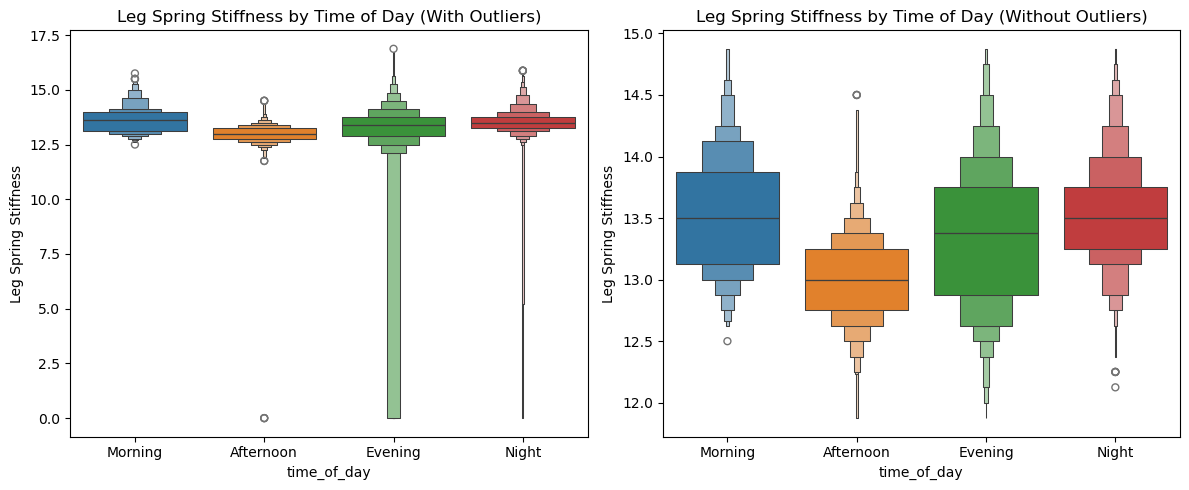

In [9]:
# Visualizations for Leg Spring Stiffness with and without outliers (Boxen Plot)
plt.figure(figsize=(12, 5))

# With Outliers
plt.subplot(1, 2, 1)
sns.boxenplot(data=august_data, x="time_of_day", y="Leg Spring Stiffness", hue='time_of_day')
plt.title("Leg Spring Stiffness by Time of Day (With Outliers)")

# Without Outliers
filtered_data = remove_outliers(august_data, "Leg Spring Stiffness")
plt.subplot(1, 2, 2)
sns.boxenplot(data=filtered_data, x="time_of_day", y="Leg Spring Stiffness", hue='time_of_day')
plt.title("Leg Spring Stiffness by Time of Day (Without Outliers)")

# Adjust layout
plt.tight_layout()

# Save the figure with descriptive filename
#plt.savefig(os.path.join(save_dir, "leg_spring_stiffness_with_and_without_outliers.png"))

plt.show()

**Observation:**
Leg spring stiffness is actually lowest in the afternoon, which may suggest a less intense or varied range of exercises during this time. Higher stiffness values in the evening and morning indicate activities with greater impact or force.
---

<a id="vertical-oscillation-section"></a>
### Vertical Oscillation
**Description:** Vertical Oscillation measures the vertical movement of the center of mass, typically at the pelvis, during running. It can vary between 3–15 cm and is best used for observing trends in training rather than aiming for a specific value. Variations in vertical oscillation are often linked to fitness improvements or changes in training load.

*Visualization:* Boxen plot of Vertical Oscillation by time of day

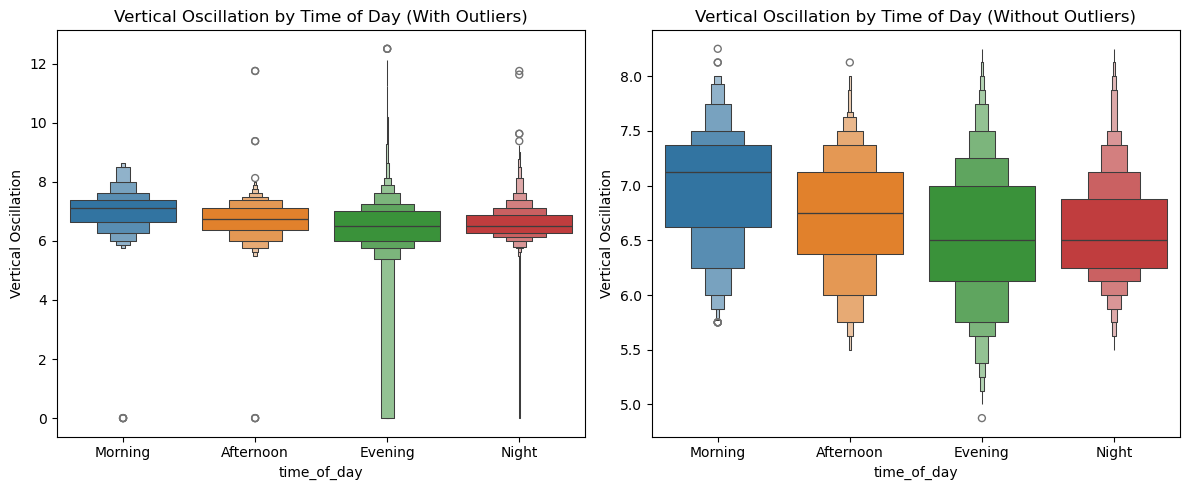

In [10]:
# Visualizations for Vertical Oscillation with and without outliers (Boxen Plot)
plt.figure(figsize=(12, 5))

# With Outliers
plt.subplot(1, 2, 1)
sns.boxenplot(data=august_data, x="time_of_day", y="Vertical Oscillation", hue='time_of_day')
plt.title("Vertical Oscillation by Time of Day (With Outliers)")

# Without Outliers
filtered_data = remove_outliers(august_data, "Vertical Oscillation")
plt.subplot(1, 2, 2)
sns.boxenplot(data=filtered_data, x="time_of_day", y="Vertical Oscillation", hue='time_of_day')
plt.title("Vertical Oscillation by Time of Day (Without Outliers)")

# Adjust layout
plt.tight_layout()

# Save the figure with descriptive filename
#plt.savefig(os.path.join(save_dir, "vertical_oscillation_with_and_without_outliers.png"))

plt.show()

**Observation:**
Vertical Oscillation tends to be highest in the morning, suggesting that increased intensity or varied terrain may contribute to greater vertical movement during these times.

<a id="observations-on-heart-rate-and-distance-section"></a>
### Heart Rate and Distance

In this section, we analyze heart rate and distance metrics in relation to the time of day. These observations provide insights into how heart rate varies during different periods, especially highlighting a bimodal distribution observed in the afternoon. Additionally, we explore the distribution of distance covered by time of day, offering further insights into the data.

<a id="heart-rate-section"></a>
#### Heart Rate Observations
- **Time of Day KDE Plot**: We use a Kernel Density Estimate (KDE) plot to visualize the heart rate distribution by time of day, allowing us to observe patterns and differences across times.
- **Bimodal Distribution**: During the afternoon, heart rate exhibits a bimodal distribution. To explore this further, we use a Gaussian Mixture Model (GMM) with two components to model the distribution, highlighting the two distinct peaks and providing a clearer view of the bimodal characteristics.

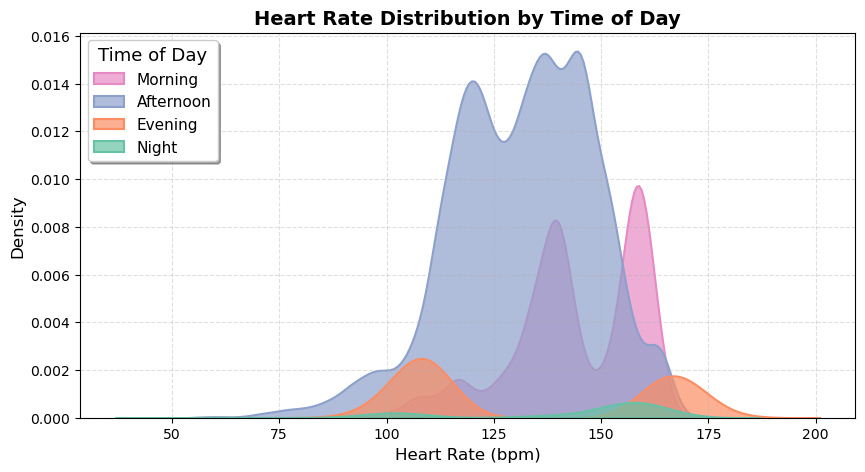

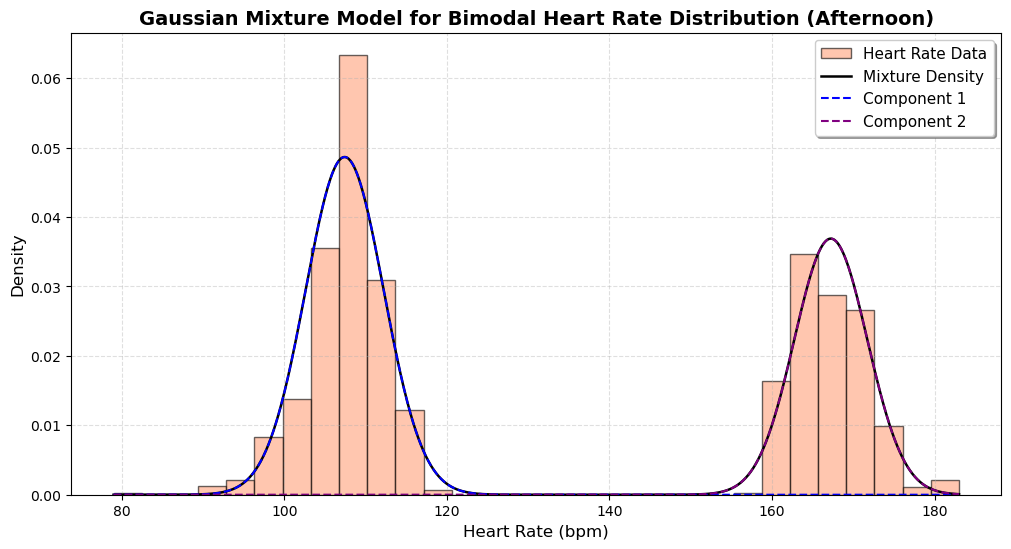

In [11]:
# Ensure 'time_of_day' is ordered categorically
df['time_of_day'] = pd.Categorical(df['time_of_day'], categories=["Morning", "Afternoon", "Evening", "Night"], ordered=True)

# Enhanced KDE plot of heart rate by time of day
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x="heart_rate", hue="time_of_day", fill=True, palette="Set2", linewidth=1.5, alpha=0.7)
plt.title("Heart Rate Distribution by Time of Day", fontsize=14, weight='bold')
plt.xlabel("Heart Rate (bpm)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Time of Day", title_fontsize='13', fontsize='11', loc='upper left', frameon=True, shadow=True, labels=["Morning", "Afternoon", "Evening", "Night"])
plt.grid(linestyle='--', alpha=0.4)
plt.show()

# Filter data for afternoon time of day and select only heart rate column
afternoon_heart_rate = df[df['time_of_day'] == 'Afternoon']['heart_rate'].dropna().values.reshape(-1, 1)

# Create figure for advanced histogram with GMM
plt.figure(figsize=(12, 6))

# Fit a Gaussian Mixture Model with two components
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(afternoon_heart_rate)

# Generate a range of values for heart rate to evaluate the GMM
x = np.linspace(afternoon_heart_rate.min(), afternoon_heart_rate.max(), 1000).reshape(-1, 1)
logprob = gmm.score_samples(x)
responsibilities = gmm.predict_proba(x)
pdf = np.exp(logprob)

# Plot histogram and the fitted Gaussian components
plt.hist(afternoon_heart_rate, bins=30, density=True, alpha=0.6, color='#FFA07A', edgecolor='black', label="Heart Rate Data")
plt.plot(x, pdf, '-k', linewidth=1.8, label="Mixture Density")
plt.plot(x, responsibilities[:, 0] * pdf, '--', color='blue', linewidth=1.5, label="Component 1")
plt.plot(x, responsibilities[:, 1] * pdf, '--', color='purple', linewidth=1.5, label="Component 2")
plt.xlabel("Heart Rate (bpm)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Gaussian Mixture Model for Bimodal Heart Rate Distribution (Afternoon)", fontsize=14, weight='bold')
plt.legend(fontsize='11', loc='upper right', frameon=True, shadow=True)
plt.grid(linestyle='--', alpha=0.4)
plt.show()

**Observation (KDE plot):**
Heart rate distribution is wider in the afternoon, hinting at varied intensities, from warm-ups to intense activities. Evening sessions show more concentrated distributions, indicating steady workout intensity.

**Observation (GMM plot):**
The GMM reveals two distinct peaks in the afternoon heart rate data, suggesting separate activity phases or varied workout intensities, such as intervals or alternation between aerobic and anaerobic exercise.

<a id="distance-section"></a>
#### Distance Observations
- **Distance Histogram**: The distribution of distance is analyzed with a histogram by time of day, offering insights into variations in distances covered across different times. The histogram is presented with and without outliers to enhance understanding of distribution patterns.
- **Advanced Visualization**: An advanced histogram visualization provides a more nuanced view of distance data, highlighting trends and outliers for each time of day.

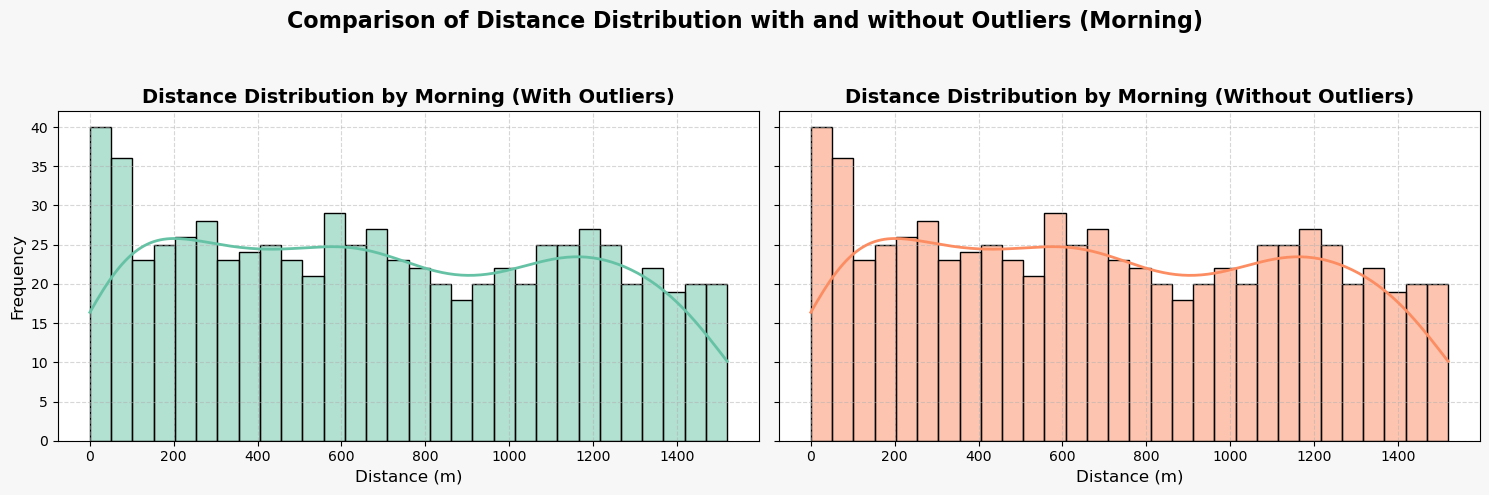

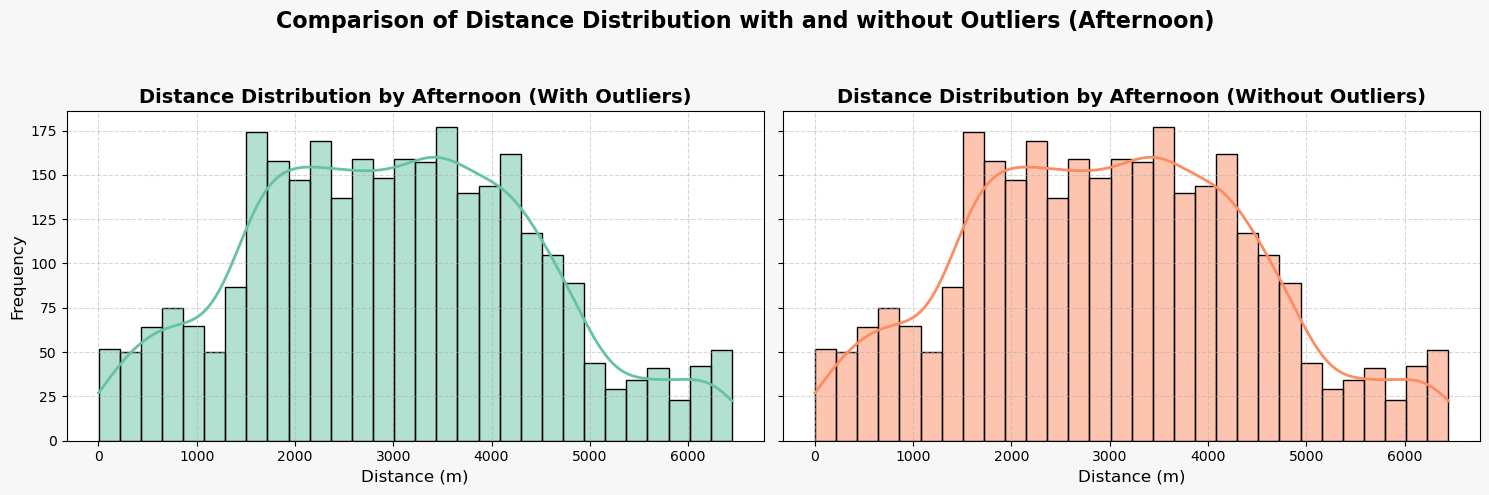

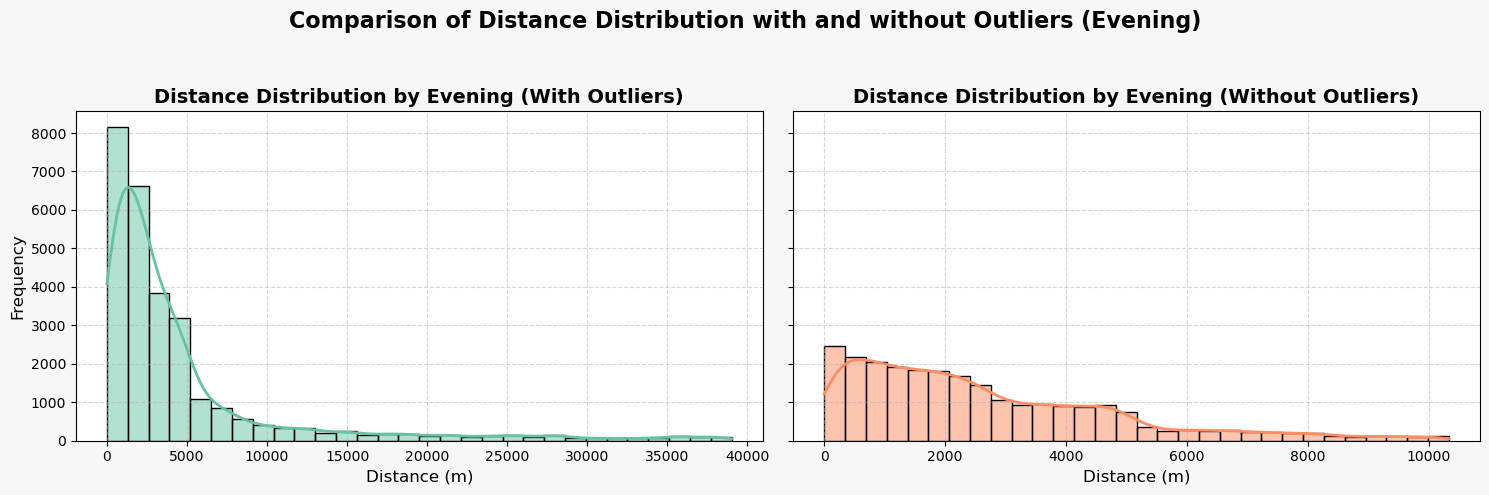

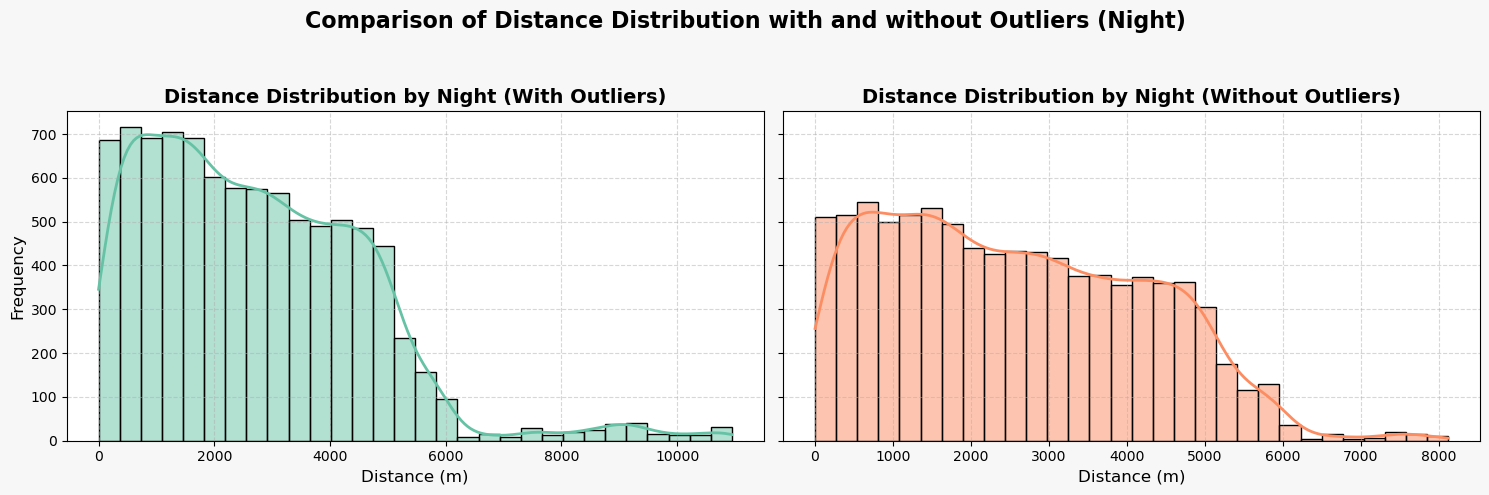

In [12]:
# Ensure 'time_of_day' is ordered categorically
df['time_of_day'] = pd.Categorical(df['time_of_day'], categories=["Morning", "Afternoon", "Evening", "Night"], ordered=True)

# Define the times of day to loop through in the specified order
times_of_day = df['time_of_day'].cat.categories

# Loop over each time of day and create side-by-side histograms
for time in times_of_day:
    # Filter data for the current time of day
    data_time_of_day = df[df['time_of_day'] == time]
    
    # Remove outliers using the IQR method
    data_time_of_day_no_outliers = remove_outliers(data_time_of_day, 'distance')
    
    # Create a figure with two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True, facecolor='#f7f7f7')
    
    # Plot with outliers
    sns.histplot(data=data_time_of_day, x="distance", kde=True, bins=30, color="#66c2a5", edgecolor="black", ax=axes[0], line_kws={"linewidth": 2})
    axes[0].set_title(f"Distance Distribution by {time} (With Outliers)", fontsize=14, weight='bold')
    axes[0].set_xlabel("Distance (m)", fontsize=12)
    axes[0].set_ylabel("Frequency", fontsize=12)
    axes[0].grid(visible=True, linestyle='--', alpha=0.5)
    
    # Plot without outliers
    sns.histplot(data=data_time_of_day_no_outliers, x="distance", kde=True, bins=30, color="#fc8d62", edgecolor="black", ax=axes[1], line_kws={"linewidth": 2})
    axes[1].set_title(f"Distance Distribution by {time} (Without Outliers)", fontsize=14, weight='bold')
    axes[1].set_xlabel("Distance (m)", fontsize=12)
    axes[1].grid(visible=True, linestyle='--', alpha=0.5)
    
    # Set a main title for the figure
    fig.suptitle(f"Comparison of Distance Distribution with and without Outliers ({time})", fontsize=16, weight='bold')
    
    # Adjust layout and save the figure
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    # plt.savefig(os.path.join(save_dir, f"distance_distribution_{time}.png"))
    plt.show()

**Observation:**
The distance distribution varies throughout the day, with morning sessions showing a near-uniform distribution, indicating consistent distances. Afternoon sessions exhibit a near-normal distribution, with distances clustered around a central value. Evening and night sessions are both right-skewed, favoring shorter distances. Removing outliers had minimal impact across all times of day, suggesting that the typical distance patterns for each period are stable and not heavily influenced by extreme values. Overall, morning and afternoon show more balanced distributions, while evening and night lean towards shorter distances.
---

### Summary and Key Insights

This analysis provides an in-depth examination of various exercise metrics with a focus on time-of-day patterns and data specific to August. By evaluating metrics like heart rate, distance, power, and cadence, the analysis sheds light on how physiological responses and exercise performance vary throughout the day. 

**Key Insights:**

1. **Heart Rate Patterns**: Heart rate in the afternoon displays a bimodal distribution, suggesting the presence of distinct activity intensities or workout phases during this period. This pattern may reflect varied training routines or adaptations to environmental conditions in the afternoon.

2. **Distance Distribution**: The distance covered varies across the day, with morning sessions showing a near-uniform distribution, afternoon sessions displaying a near-normal distribution, and evening and night sessions skewed towards shorter distances. Outlier removal had little effect on these patterns, indicating a stable distribution that’s largely unaffected by extreme values.

3. **August-Specific Metrics**: Metrics analyzed exclusively for August, such as Air Power, Cadence, and Form Power, reveal time-of-day variations that could inform training optimization. Notably, Air Power remains stable until night, where it increases, while Ground Contact Time tends to rise throughout the day, and Power shows a gradual decline from morning to night. These trends may guide strategies for improving performance under specific conditions.

4. **Visualization Effectiveness**: Using side-by-side plots with and without outliers, alongside advanced techniques like Gaussian Mixture Models, effectively highlights data patterns and distribution changes, enhancing the clarity and interpretability of the analysis.

This comprehensive exploration of exercise data by time of day offers actionable insights that could assist in designing targeted training sessions and understanding physiological responses over the course of a day.